In [1]:
 # coding: utf-8

# In[278]:


#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#importing packages
import glob
import os
import random
import logging
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [7]:
# In[269]:


#path to the master_dataframe containing both circuit and supreme court level case data 
master_dataframe = pd.read_csv("/home/jcai/geometry_of_law/Encyclopedia Entry/master_dataframe.csv")


# In[270]:


#path to the dataframe containing both circuit and supreme court level case similarity data
#generated by 181119_similarity_to_issue.py

df_list = []

for roots, dirs, files in os.walk('/home/jcai/geometry_of_law/similarity_to_issues'):
    for file in files:
        if file.endswith(".csv"):
            df_list.append(os.path.join(roots, file))

compare_dataframe = master_dataframe

In [8]:
for df_path in df_list:
    df = pd.read_csv(df_path)
    compare_dataframe = compare_dataframe.merge(df, left_on = compare_dataframe['docname'], 
                                                right_on = df['id_list'])
    compare_dataframe = compare_dataframe.drop(columns = ["key_0"])

In [10]:
df_name_list = ["similarity_to_"+x.split(".")[0].split("/")[-1] for x in df_list]
columns_keep = ['docname', 'judge_name', 'party', 'year', 'circuit','big-issue']+df_name_list
compare_dataframe = compare_dataframe[columns_keep]

In [11]:
def quantile_conditional_probability(df,score,quantile,issue):
    quantile_similarity = df[score].quantile(quantile)
    cond_prob = len(df[(df[score]>=quantile_similarity)&(df["big-issue"]==issue)])/len(df[df[score]>=quantile_similarity])
    uncond_prob = len(df[df["big-issue"]==issue])/len(df)
    
    return cond_prob, uncond_prob

In [12]:
def plot_quantile_conditional_probability(df,score,issue):
    quantile_cond_prob = []
    n_alphas = 100
    alphas = np.linspace(0,1,n_alphas)
    
    for alpha in alphas:
        cond_prob, uncond_prob = quantile_conditional_probability(compare_dataframe,score,alpha,issue)
        quantile_cond_prob.append((cond_prob, uncond_prob))
    
    plt.plot(alphas[0:n_alphas-1],quantile_cond_prob[0:n_alphas-1])
    plt.ylabel('Probability')
    
    # Set the formatter
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    
    plt.title('Conditional on being in Top-X-percent: '+score)
    plt.savefig("/home/jcai/geometry_of_law/similarity_to_issues/"+score+'.jpeg',format='jpeg',pad_inches=5)
    plt.show()

similarity_to_regulation_add_vec


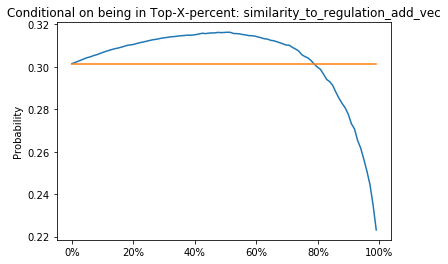

similarity_to_regulation_inferred_vec


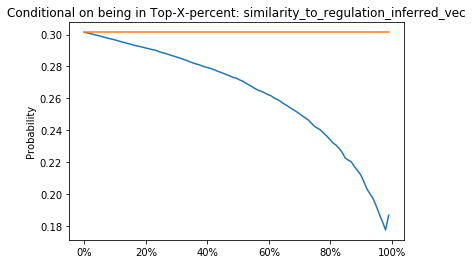

similarity_to_privacy_add_vec


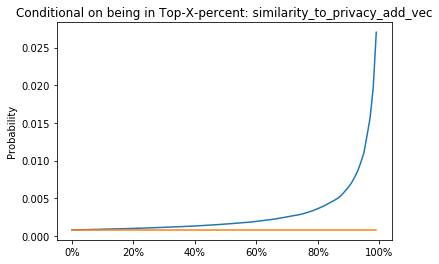

similarity_to_privacy_inferred_vec


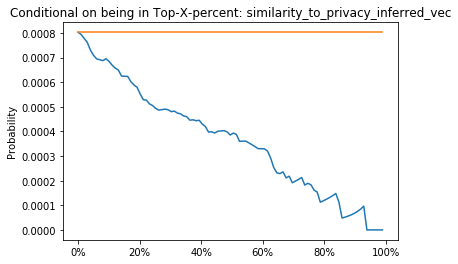

similarity_to_labor_add_vec


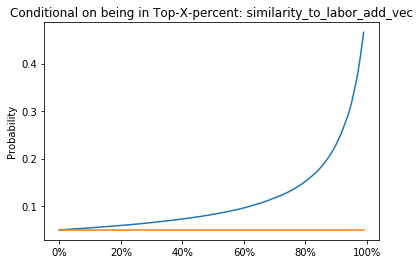

similarity_to_labor_inferred_vec


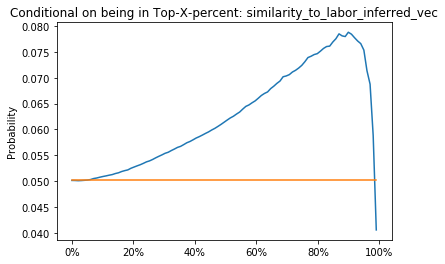

similarity_to_criminal-appeals_add_vec


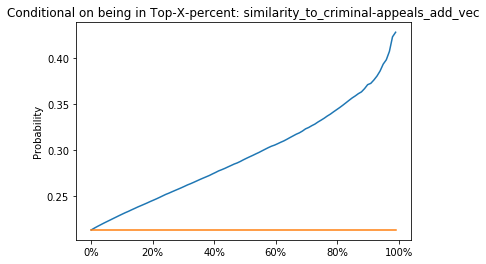

similarity_to_criminal-appeals_inferred_vec


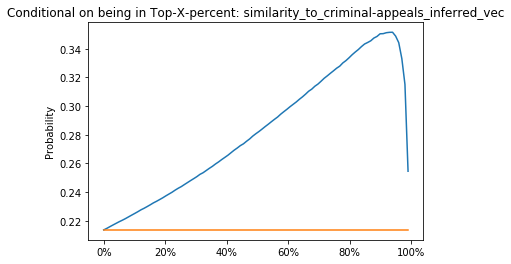

similarity_to_civil-rights_add_vec


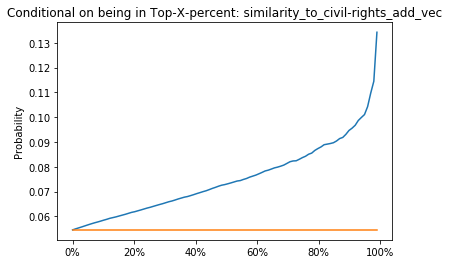

similarity_to_civil-rights_inferred_vec


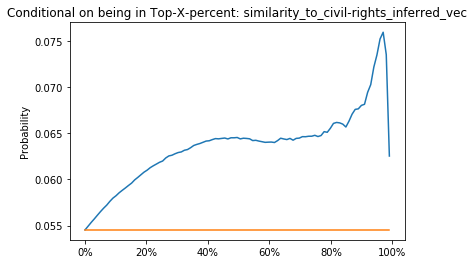

similarity_to_first-admendment_inferred_vec


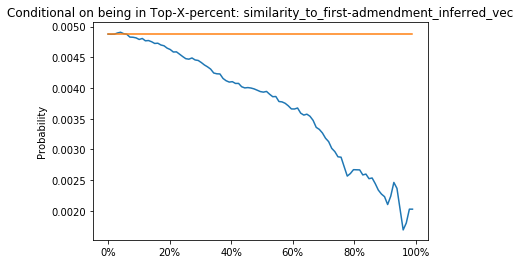

similarity_to_due-process_add_vec


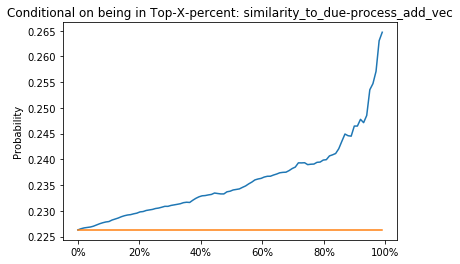

similarity_to_due-process_inferred_vec


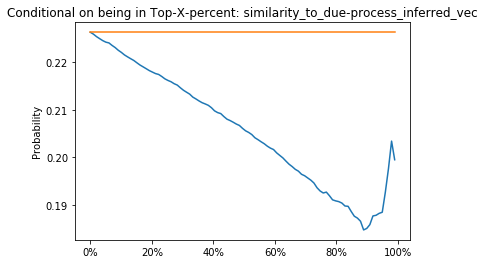

In [13]:
variable_name_dict = {'similarity_to_regulation_add_vec': "7", 'similarity_to_regulation_inferred_vec': "7", 
'similarity_to_privacy_add_vec':"5", 'similarity_to_privacy_inferred_vec':"5",
'similarity_to_labor_add_vec':"6",'similarity_to_labor_inferred_vec':"6",
'similarity_to_criminal-appeals_add_vec':"1",'similarity_to_criminal-appeals_inferred_vec':"1",
'similarity_to_civil-rights_add_vec':"2",'similarity_to_civil-rights_inferred_vec':"2",
'similarity_to_first-admendment_inferred_vec':"3",
'similarity_to_due-process_add_vec':"4",'similarity_to_due-process_inferred_vec':"4"}

# In[281]:


for key in variable_name_dict.keys():
    print(key)
    plot_quantile_conditional_probability(compare_dataframe,key,variable_name_dict[key])